### well structured - an ode to databases


# linear regression

### import libraries

In [2]:
import yfinance as yf
#import sqlite3
import pandas as pd
import sqlite3

from sklearn.linear_model import LinearRegression

# import the visualization package: seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# linear regression

In [9]:
lm = LinearRegression()
lm

LinearRegression()

In [15]:
#ticker_symbols = ['WY', 'SCA-B.ST'] #, 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']

ticker_symbol_1 = 'WOOE.AS'
ticker_symbol_2 = 'WY'

# load first item
company_name = yf.Ticker(ticker_symbol_1).info['longName'].replace(r'/', ' ')
columns = '`close_normal_' + ticker_symbol_1 + '`'
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_1 = pd.read_sql(sql,conn)

# load second item
company_name = yf.Ticker(ticker_symbol_2).info['longName'].replace(r'/', ' ')
columns = 'close_normal_' + ticker_symbol_2
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_2 = pd.read_sql(sql,conn)

X = aux_var_stock_price_1
Y = aux_var_stock_price_2

In [29]:
aux_var_stock_prices = pd.concat([aux_var_stock_price_1, aux_var_stock_price_2], axis=1)
print(aux_var_stock_prices)

     close_normal_WOOE.AS  close_normal_WY
0                0.780673         0.797964
1                0.777786         0.777169
2                0.779139         0.824177
3                0.776703         0.818810
4                0.898989         0.827190
..                    ...              ...
619              0.885323         0.817518
620              0.891370         0.818896
621              0.895297         0.815657
622              0.894309         0.827149
623              0.899000         0.828139

[624 rows x 2 columns]


In [11]:
lm.fit(X,Y)

LinearRegression()

In [16]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([[0.73358979],
       [0.73097564],
       [0.73220101],
       [0.72999536],
       [0.84072065]])

In [17]:
lm.intercept_

array([0.02671808])

In [18]:
lm.coef_

array([[0.90546433]])

(0.0, 1.0221447659981335)

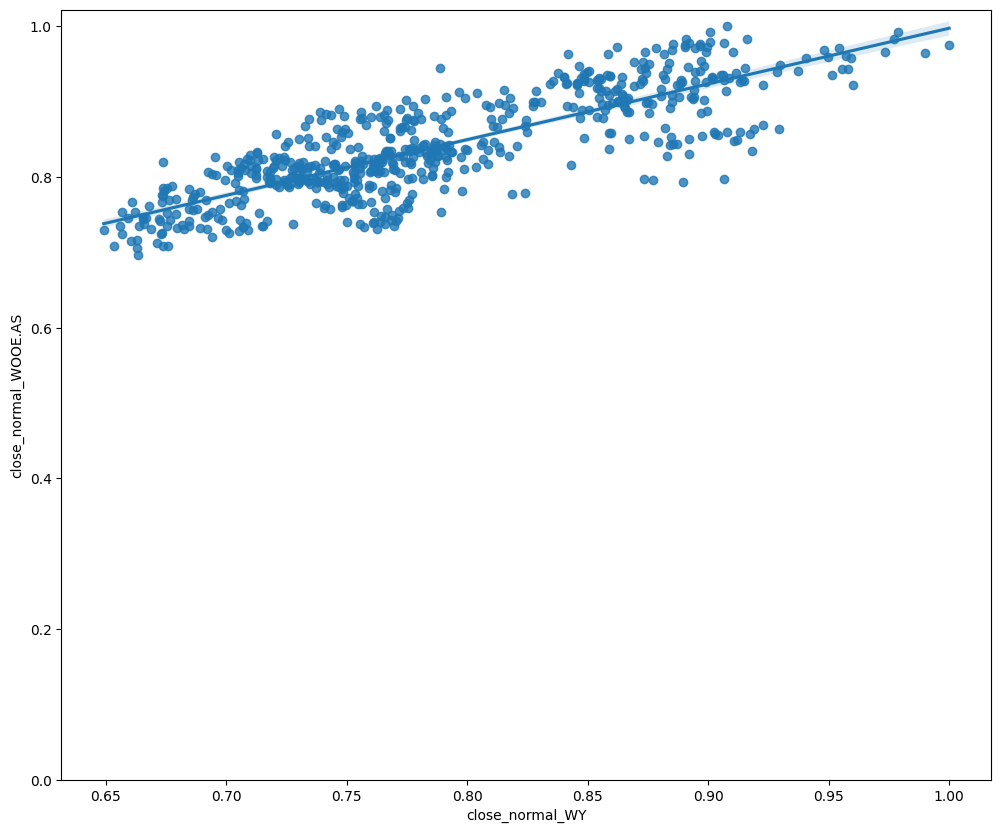

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="close_normal_WY", y="close_normal_WOOE.AS", data=aux_var_stock_prices)
plt.ylim(0,)

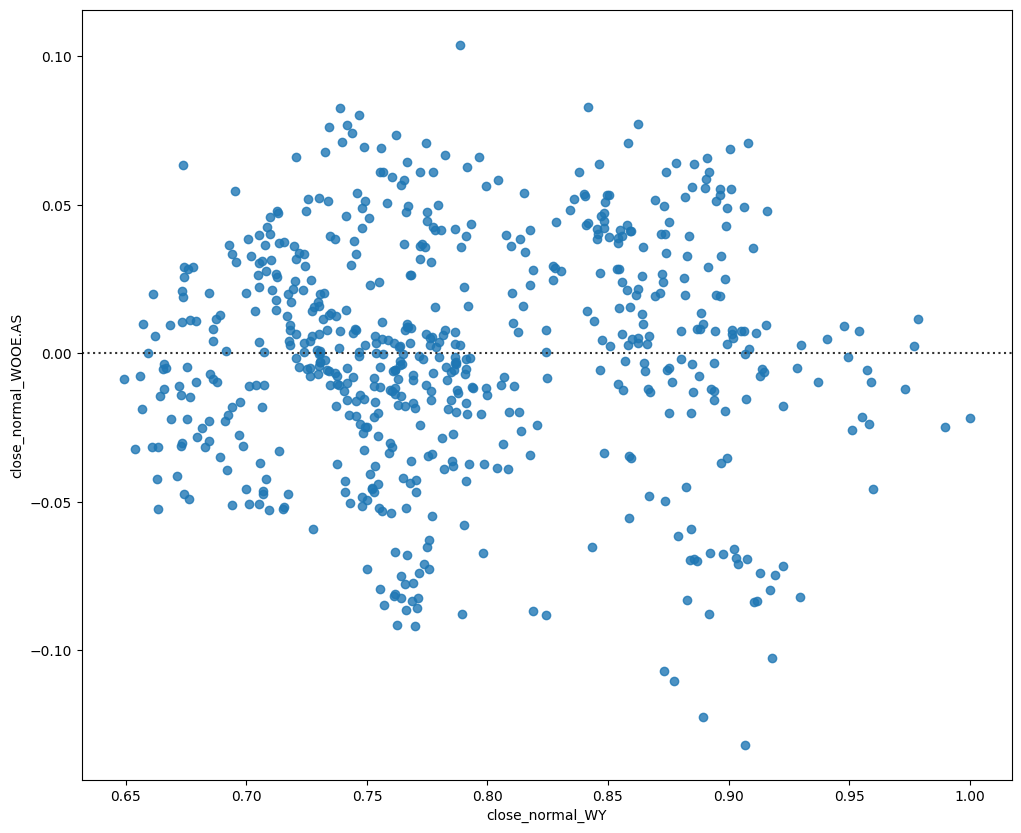

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=aux_var_stock_prices["close_normal_WY"], y=aux_var_stock_prices["close_normal_WOOE.AS"])
plt.show()

# multiple linear regression

In [19]:
ticker_symbol_3 = 'SCA-B.ST'
ticker_symbol_4 = 'SUZ'

# load first item
company_name = yf.Ticker(ticker_symbol_3).info['longName'].replace(r'/', ' ')
columns = '`close_normal_' + ticker_symbol_3 + '`'
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_3 = pd.read_sql(sql,conn)

# load second item
company_name = yf.Ticker(ticker_symbol_4).info['longName'].replace(r'/', ' ')
columns = 'close_normal_' + ticker_symbol_4
conn = sqlite3.connect('stocks_prep.db')
sql = "SELECT " + columns + " FROM `" + company_name + "`"
aux_var_stock_price_4 = pd.read_sql(sql,conn)

In [25]:
aux_var_stock_prices = pd.concat([aux_var_stock_price_2, aux_var_stock_price_3, aux_var_stock_price_4], axis=1)
Z = aux_var_stock_prices

In [26]:
lm.fit(Z, X)

LinearRegression()

In [33]:
Yhat=lm.predict(Z)
Yhat[0:5]  

array([[0.81570222],
       [0.79940135],
       [0.83094969],
       [0.82440438],
       [0.82975403]])

In [22]:
lm.intercept_

array([0.16911608])

In [23]:
lm.coef_

array([[0.60342475, 0.19761314, 0.05929577]])

/home/lj/JohannsenDrive/Aktuelle_Projekte/Scaja_Projekt/scaja_data/scaja_data_marketing/07_python_libraries_ultimate_toolkits/notebooks/venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 1200x1000 with 0 Axes>

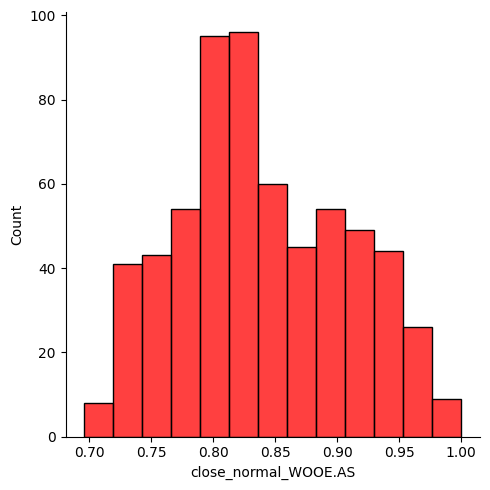

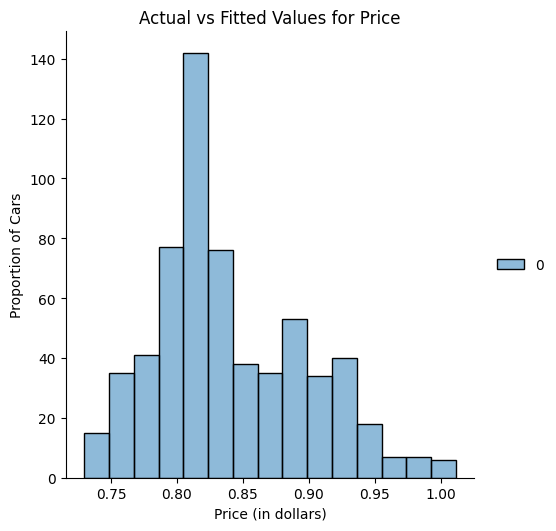

In [38]:
plt.figure(figsize=(width, height))


ax1 = sns.displot(aux_var_stock_prices['close_normal_WOOE.AS'], color="r", label="Actual Value")
sns.displot(Yhat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## polynominal regression and pipeline

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

In [ ]:
Z_pr.shape

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

## in sample evaluation

# linear regression

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

# multiple linear regression

In [ ]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

## polynominal fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

In [ ]:
mean_squared_error(df['price'], p(x))

## prediction and decision making

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
lm.fit(X, Y)
lm

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

In [ ]:
plt.plot(new_input, yhat)
plt.show()

# conclusion